In [1]:
import networkx as nx
import community
import numpy as np
import matplotlib.pyplot as plt
from random import randint,random
import networkx as nx
import matplotlib.pyplot as plt
import torch
import pickle
import scipy.sparse as sparse
from visualization import RANDOM_STATE
from spectral_cluster_model import clustering_experiment, weights_to_graph,cluster_net,delete_isolated_ccs,weights_array_to_cluster_quality
from visualization import run_spectral_cluster,build_cluster_graph
from collections import Counter
from matplotlib.ticker import MaxNLocator

FileNotFoundError: [Errno 2] No such file or directory: 'CoraConvergence/WeightChanges-Cora-GCN-param_512_2_0.99_0.2-monte_0-120.pt'

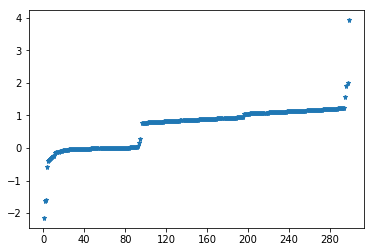

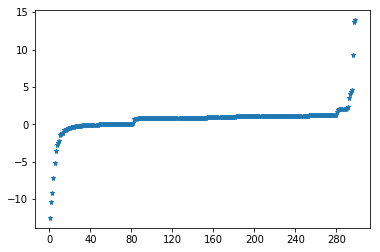

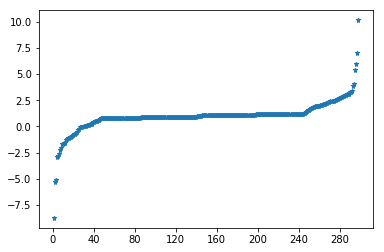

In [4]:
dataset="Cora"
file_constraited=dataset+"Convergence"

for epoch in range(0,200,40):
    weights_path0=dataset+"Convergence/WeightChanges-Cora-GCN-param_512_2_0.99_0.2-monte_0-"+str(epoch)+".pt"
    weights_array0=torch.load(weights_path0)
    weights_array=[]
    for (i, weight) in enumerate(weights_array0):
        weight = weight[:100,:100].cpu().detach().numpy()
        weights_array.append(weight)
    weights_path=dataset+"Convergence/WeightChanges-Cora-GCN-param_512_2_0.99_0.2-monte_0-"+str(epoch)+".pckl"  
    pickle.dump(weights_array,open(weights_path,'wb'))
    
    
    adj_mat=weights_to_graph(weights_array)
    new_weight_array, new_adj_mat=delete_isolated_ccs(weights_array, adj_mat)
   
    num_clusters=6
    assign_labels = 'kmeans'
    eigen_solver = 'amg'
    epsilon=1e-8
    #[ncut_val, clustering_labels]=weights_array_to_cluster_quality(weights_array, adj_mat, num_clusters,eigen_solver, assign_labels, epsilon,is_testing=False)
    #    weights_array_to_cluster_quality() 
    #[labels, metrics]=run_spectral_cluster(weights_path)
    plot_eigenvalues(weights_array)
    #labels=cluster_net(num_clusters, adj_mat, eigen_solver, assign_labels)
    #build_cluster_graph(weights_path,labels,normalize_in_out=True)


In [72]:
import numpy as np
M=100
N=50
mat=np.random.randn(M,N)
import scipy.sparse as sparse

A11=np.zeros((M,M))
A12=mat
A21=np.zeros((N,N))
A21=mat.transpose()
Block = np.block([[A11, A12], [A21, A22]])


(150, 150)


In [79]:
def ConvertToAdjaency(A):
    sp_mat = sparse.coo_matrix(np.abs(A))
    N=A.shape
    G=nx.Graph()
    partition=community.best_partition(G) 
    pos = nx.spring_layout(G)  # compute graph layout
    plt.figure(figsize=(8, 8))  # image is 8 x 8 inches
    plt.axis('off')
    nx.draw_networkx_nodes(G, pos, node_size=10, cmap=plt.cm.RdYlGn, node_color=list(partition.values()))
    nx.draw_networkx_edges(G, pos, alpha=0.3)
    plt.show(G)

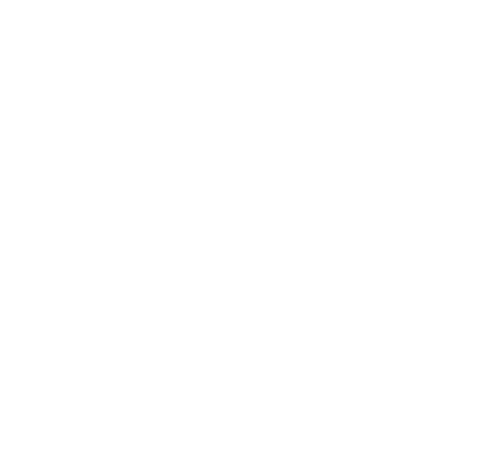

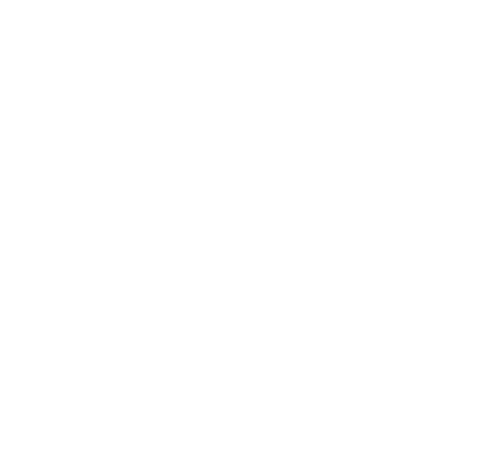

In [80]:
ConvertToAdjaency(Block)

In [21]:
def GrowConnectivity(G):
    algebraic_connectivity=[]
    for k in range(2):
        algebraic_connectivity.append([])
        for i in range(N):
            G.add_edge(randint(0,N-1),randint(0,N-1))
            algebraic_connectivity[k].append(nx.linalg.algebraic_connectivity(G))